In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
regSeason = pd.read_csv("./data/MRegularSeasonDetailedResults.csv")
regSeason.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      10     1272      70     1393      63    N      0    26    62   
2    2003      11     1266      73     1437      61    N      0    24    58   
3    2003      11     1296      56     1457      50    N      0    18    38   
4    2003      11     1400      77     1208      71    N      0    30    61   

   ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0  ...     10    16    22   10   22     8   18     9     2   20  
1  ...     24     9    20   20   25     7   12     8     6   16  
2  ...     26    14    23   31   22     9   12     2     5   23  
3  ...     22     8    15   17   20     9   19     4     3   23  
4  ...     16    17    27   21   15    12   10     7     1   14  

[5 rows x 34 columns]

In [4]:

regSeason = pd.read_csv("./data/MRegularSeasonDetailedResults.csv")
tournRes = pd.read_csv("./data/MNCAATourneyCompactResults.csv")

statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["AVG" + stat for stat in statsToMeasure]
statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = statsMeasured + ["RAT" + stat for stat in statsToMeasure]

seasonStats = {}
seasonStats["Season"] = [0]
seasonStats["TeamID"] = [0]
seasonStats["GamesWon"] = [0]
seasonStats["HighDay"] = [0]
for stat in statsMeasured:
    seasonStats[stat] = [0]

seasonStats = pd.DataFrame(seasonStats)

teams = regSeason["WTeamID"].unique()
seasons = regSeason["Season"].unique()
        
for team in teams:
    teamStats = regSeason.loc[(regSeason["WTeamID"] == team) | (regSeason["LTeamID"] == team)]
    
    currTeamTournRes = tournRes.loc[(tournRes["WTeamID"] == team) | (tournRes["LTeamID"] == team)]
    currTeamTournResHighDay = currTeamTournRes.groupby("Season").max("DayNum")
    currTeamTournResHighDay = currTeamTournResHighDay.reset_index()
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 134) & (currTeamTournResHighDay["DayNum"] <= 135), "DayNum"] = 0
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 136) & (currTeamTournResHighDay["DayNum"] <= 137), "DayNum"] = 1
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 138) & (currTeamTournResHighDay["DayNum"] <= 139), "DayNum"] = 2
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 143) & (currTeamTournResHighDay["DayNum"] <= 144), "DayNum"] = 3
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 145) & (currTeamTournResHighDay["DayNum"] <= 146), "DayNum"] = 4
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 152) & (currTeamTournResHighDay["DayNum"] <= 152), "DayNum"] = 5
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 154) & (currTeamTournResHighDay["DayNum"] <= 154), "DayNum"] = 6

    for season in seasons:
        seasonGames = teamStats.loc[teamStats["Season"] == season]
        wonGames = seasonGames.loc[seasonGames["WTeamID"] == team]
        lostGames = seasonGames.loc[seasonGames["LTeamID"] == team]
        GamesWon = len(wonGames)
        
        newStats = {}
        newStats["Season"] = season
        newStats["TeamID"] = team
        newStats["GamesWon"] = GamesWon
        
        if (len(currTeamTournResHighDay.loc[currTeamTournResHighDay["Season"] == season])):
            newStats["HighDay"] = int(currTeamTournResHighDay.loc[currTeamTournResHighDay["Season"] == season]["DayNum"])
        else:
            newStats["HighDay"] = -1
            
           
        
        for stat in statsToMeasure:
            winString = "W" + stat
            loseString = "L" + stat
            totStat =  wonGames[winString].sum() + lostGames[loseString].sum()
            OtotStat = wonGames[loseString].sum() + lostGames[winString].sum()
            
            if (len(seasonGames)):
                avgStat = totStat / len(seasonGames)
                OavgStat = OtotStat / len(seasonGames)
                if (avgStat and OavgStat): 
                    ratStat = avgStat/OavgStat
                else:
                    ratStat = -1
            else:
                avgStat = -1
                OavgStat = -1
                ratStat = -1
            
            newStats["AVG" + stat] = avgStat
            newStats["OAVG" + stat] = OavgStat
            newStats["RAT" + stat] = ratStat
        newStats = pd.DataFrame([newStats])
        seasonStats = pd.concat([seasonStats, newStats], ignore_index=True)
        
seasonStats.to_csv("./seasonStats.csv")

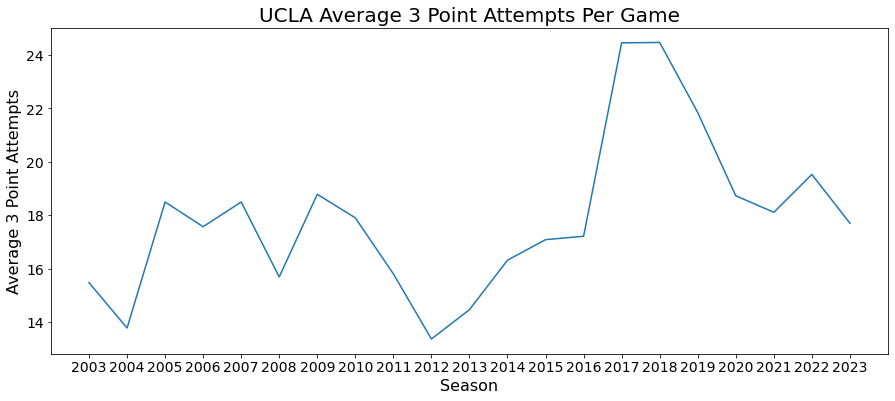

In [4]:
x = seasonStats.loc[seasonStats["TeamID"] == 1417]["Season"]
y = seasonStats.loc[seasonStats["TeamID"] == 1417]["AVGFGA3"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, y)

ax.set_xticks(x)

ax.set_title("UCLA Average 3 Point Attempts Per Game", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Average 3 Point Attempts", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("./plots/UCLAFGA3.png", dpi=200)
plt.show()

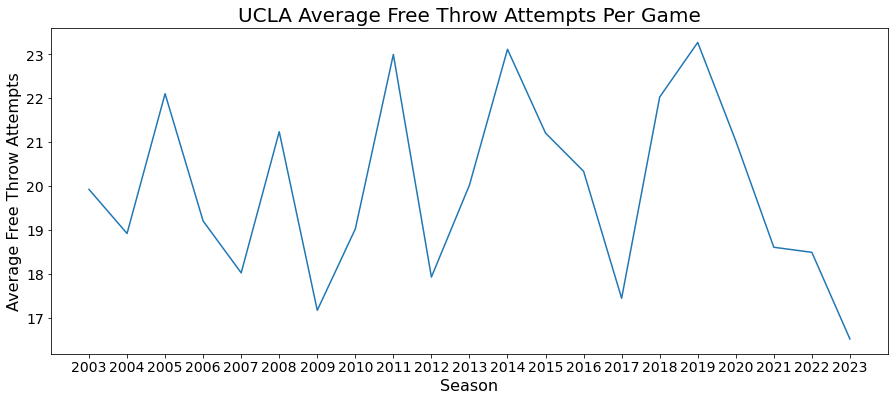

In [5]:
x = seasonStats.loc[seasonStats["TeamID"] == 1417]["Season"]
y = seasonStats.loc[seasonStats["TeamID"] == 1417]["AVGFTA"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, y)

ax.set_xticks(x)

ax.set_title("UCLA Average Free Throw Attempts Per Game", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Average Free Throw Attempts", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("./plots/UCLAFTA.png", dpi=200)
plt.show()

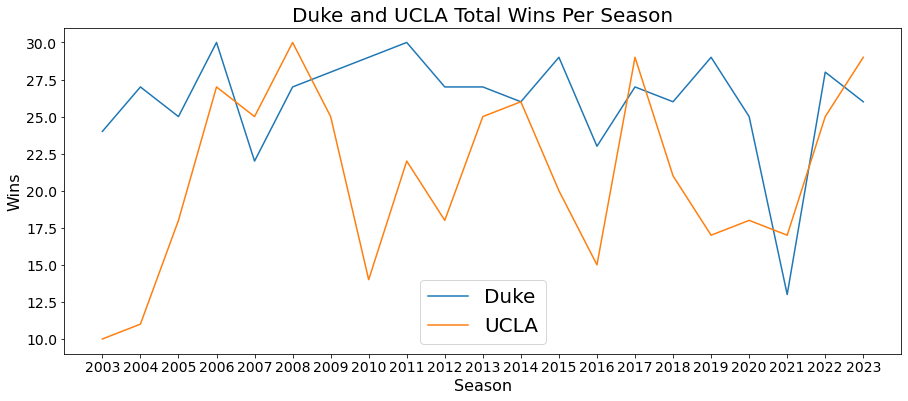

In [6]:
x = seasonStats.loc[seasonStats["TeamID"] == 1181]["Season"]
y1 = seasonStats.loc[seasonStats["TeamID"] == 1181]["GamesWon"]
y2 = seasonStats.loc[seasonStats["TeamID"] == 1417]["GamesWon"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, y1)
ax.plot(x, y2)

ax.set_xticks(x)

ax.set_title("Duke and UCLA Total Wins Per Season", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Wins", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(["Duke", "UCLA"], fontsize=20)

plt.savefig("./plots/UCLADukeWins.png", dpi=200)

plt.show()


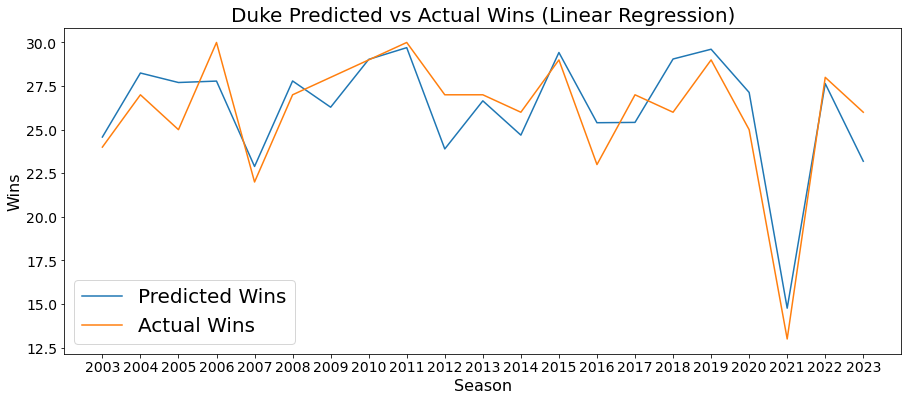

In [7]:
from sklearn.linear_model import LinearRegression

seasonStatsMod = seasonStats.loc[seasonStats["AVGFGA3"] != 0]
seasonStatsMod = seasonStatsMod.loc[seasonStats["AVGFGA3"] != -1]
seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
X = seasonStatsMod[statsMeasured].to_numpy()
y = seasonStatsMod["GamesWon"].to_numpy()

reg = LinearRegression().fit(X, y)

Duke = seasonStats.loc[seasonStats["TeamID"] == 1181]
Duke = Duke[statsMeasured].to_numpy()

predictedWins = reg.predict(Duke)
actualWins = seasonStats.loc[seasonStats["TeamID"] == 1181]["GamesWon"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, predictedWins)
ax.plot(x, actualWins)

ax.set_xticks(x)

ax.set_title("Duke Predicted vs Actual Wins (Linear Regression)", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Wins", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(["Predicted Wins", "Actual Wins"], fontsize=20)

plt.savefig("./plots/DukePredictedLinear.png", dpi=200)

plt.show()

In [8]:
for combo in zip(seasonStatsMod[statsMeasured + ["GamesWon"]].columns, reg.coef_):
    print(combo)

('AVGFGM', 0.9005691507427744)
('AVGFGA', -0.5245288832557687)
('AVGFGM3', 0.8086210086728548)
('AVGFGA3', 0.07224870487904655)
('AVGFTM', 0.6717032007517687)
('AVGFTA', -0.3459883493628489)
('AVGOR', 0.3621663447291775)
('AVGDR', -0.18786540480198055)
('AVGAst', -0.12019433982682232)
('AVGTO', -0.49269232572054733)
('AVGStl', -0.03496089647410285)
('AVGBlk', 0.0757845996084481)
('AVGPF', 0.03441847988708862)
('OAVGFGM', -0.8169547418848788)
('OAVGFGA', 0.5062335474329646)
('OAVGFGM3', -1.0512002774932354)
('OAVGFGA3', 0.08943233736719018)
('OAVGFTM', -0.883933095078182)
('OAVGFTA', 0.39857418667758154)
('OAVGOR', -0.29787423255139744)
('OAVGDR', 0.17144137316538377)
('OAVGAst', -0.07654194342809069)
('OAVGTO', 0.2514783617329582)
('OAVGStl', 0.2320726000242658)
('OAVGBlk', -0.024308833008305584)
('OAVGPF', 0.25779630022902245)
('RATFGM', 16.11818879694118)
('RATFGA', 1.2530137978349445)
('RATFGM3', 0.04294967160878976)
('RATFGA3', -1.2869727310455503)
('RATFTM', 1.2455661406914833)
('

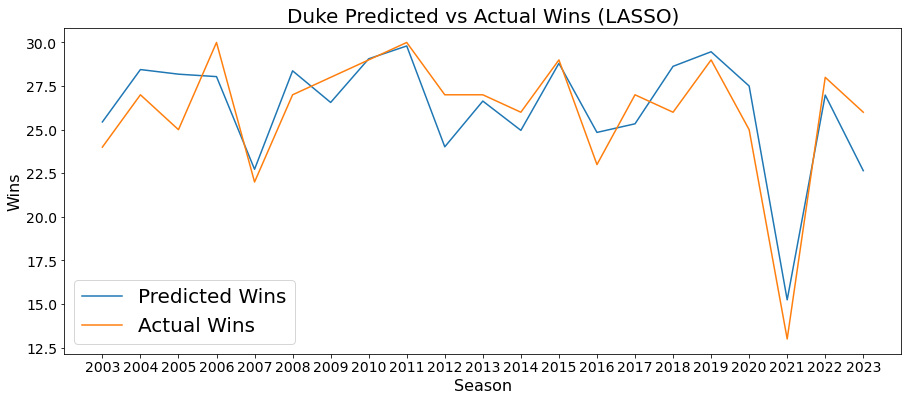

In [9]:
from sklearn import linear_model

seasonStatsMod = seasonStats.loc[seasonStats["AVGFGA3"] != 0]
seasonStatsMod = seasonStatsMod.loc[seasonStats["AVGFGA3"] != -1]
seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
X = seasonStatsMod[statsMeasured].to_numpy()
y = seasonStatsMod["GamesWon"].to_numpy()

reg = linear_model.LassoCV(cv=5, random_state=0).fit(X, y)

Duke = seasonStats.loc[seasonStats["TeamID"] == 1181]
Duke = Duke[statsMeasured].to_numpy()

predictedWins = reg.predict(Duke)
actualWins = seasonStats.loc[seasonStats["TeamID"] == 1181]["GamesWon"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, predictedWins)
ax.plot(x, actualWins)

ax.set_xticks(x)

ax.set_title("Duke Predicted vs Actual Wins (LASSO)", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Wins", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("./plots/DukePredictedLasso.png", dpi=200)

plt.legend(["Predicted Wins", "Actual Wins"], fontsize=20)

plt.show()

In [10]:
for combo in zip(seasonStatsMod[statsMeasured + ["GamesWon"]].columns, reg.coef_):
    print(combo)

('AVGFGM', 1.4082490772999388)
('AVGFGA', -0.14273859899295321)
('AVGFGM3', 0.8099930623027015)
('AVGFGA3', 0.003990967341483266)
('AVGFTM', 0.6219730986318556)
('AVGFTA', 0.0)
('AVGOR', 0.09593885722348122)
('AVGDR', 0.18577702200075782)
('AVGAst', -0.05087390204238227)
('AVGTO', -0.4637902326287283)
('AVGStl', 0.18254175741943615)
('AVGBlk', 0.07373462564738673)
('AVGPF', 0.043672286053234845)
('OAVGFGM', -1.3418232670540555)
('OAVGFGA', 0.13273963758791305)
('OAVGFGM3', -1.0406593470262142)
('OAVGFGA3', 0.1426876028093868)
('OAVGFTM', -0.8205123887028964)
('OAVGFTA', 0.036464158522281)
('OAVGOR', -0.02904840533399378)
('OAVGDR', -0.1960729232879761)
('OAVGAst', -0.12157902739973565)
('OAVGTO', 0.23638266528367208)
('OAVGStl', -0.0)
('OAVGBlk', -0.018833403486349837)
('OAVGPF', 0.24246169807880408)
('RATFGM', 0.0)
('RATFGA', 0.0)
('RATFGM3', 0.0)
('RATFGA3', -0.0)
('RATFTM', 0.6624123429408257)
('RATFTA', 0.0)
('RATOR', 0.0)
('RATDR', 0.0)
('RATAst', 0.0)
('RATTO', -0.0)
('RATStl', 0

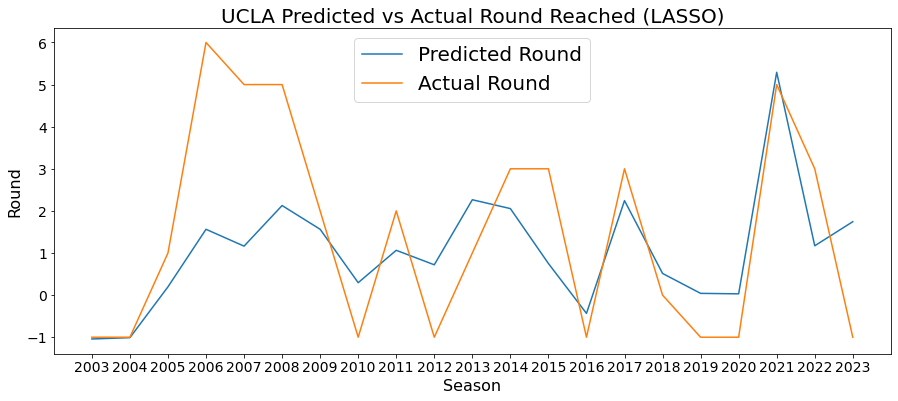

In [11]:
from sklearn import linear_model

testTeam = 1417

names = pd.read_csv("./data/MTeams.csv")

seasonStatsMod = seasonStats.loc[seasonStats["AVGFGA3"] != 0]
seasonStatsMod = seasonStatsMod.loc[seasonStats["AVGFGA3"] != -1]
seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != testTeam]
X = seasonStatsMod[statsMeasured + ["GamesWon"]].to_numpy()
y = seasonStatsMod["HighDay"].to_numpy()

reg = linear_model.LassoCV(cv=5, random_state=0).fit(X, y)

Test = seasonStats.loc[seasonStats["TeamID"] == testTeam]
Test = Test[statsMeasured + ["GamesWon"]].to_numpy()

predictedDay = reg.predict(Test)

actualDay = seasonStats.loc[seasonStats["TeamID"] == testTeam]["HighDay"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(x, predictedDay)
ax.plot(x, actualDay)

ax.set_xticks(x)

teamName = names.loc[names["TeamID"] == testTeam]["TeamName"].to_string(index=False)
ax.set_title(f"{teamName} Predicted vs Actual Round Reached (LASSO)", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Round", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("./plots/TestPredictedDayLasso.png", dpi=200)

plt.legend(["Predicted Round", "Actual Round"], fontsize=20)

plt.show()

In [12]:
for combo in zip(seasonStatsMod[statsMeasured + ["GamesWon"]].columns, reg.coef_):
    print(combo)

('AVGFGM', 0.0)
('AVGFGA', 0.0)
('AVGFGM3', 0.0)
('AVGFGA3', -0.009866137884111198)
('AVGFTM', 0.02516273606077368)
('AVGFTA', 0.15846939137459862)
('AVGOR', 0.056313999127329685)
('AVGDR', -0.0)
('AVGAst', 0.08947394351483606)
('AVGTO', -0.0)
('AVGStl', -0.0)
('AVGBlk', 0.0)
('AVGPF', -0.016577503516286268)
('OAVGFGM', -0.0)
('OAVGFGA', 0.0)
('OAVGFGM3', 0.0)
('OAVGFGA3', 0.0)
('OAVGFTM', 0.0)
('OAVGFTA', 0.0)
('OAVGOR', 0.009774895321266505)
('OAVGDR', -0.0)
('OAVGAst', -0.0)
('OAVGTO', 0.0)
('OAVGStl', -0.0)
('OAVGBlk', -0.0)
('OAVGPF', -0.39500191747457813)
('RATFGM', 0.0)
('RATFGA', 0.0)
('RATFGM3', 0.0)
('RATFGA3', -0.0)
('RATFTM', 0.0)
('RATFTA', 0.0)
('RATOR', -0.0)
('RATDR', 0.0)
('RATAst', 0.0)
('RATTO', -0.0)
('RATStl', -0.0)
('RATBlk', 0.0)
('RATPF', -0.0)
('GamesWon', 0.14158292266576353)


In [13]:
seasonStatsMod[statsMeasured + ["GamesWon"]].columns

Index(['AVGFGM', 'AVGFGA', 'AVGFGM3', 'AVGFGA3', 'AVGFTM', 'AVGFTA', 'AVGOR',
       'AVGDR', 'AVGAst', 'AVGTO', 'AVGStl', 'AVGBlk', 'AVGPF', 'OAVGFGM',
       'OAVGFGA', 'OAVGFGM3', 'OAVGFGA3', 'OAVGFTM', 'OAVGFTA', 'OAVGOR',
       'OAVGDR', 'OAVGAst', 'OAVGTO', 'OAVGStl', 'OAVGBlk', 'OAVGPF', 'RATFGM',
       'RATFGA', 'RATFGM3', 'RATFGA3', 'RATFTM', 'RATFTA', 'RATOR', 'RATDR',
       'RATAst', 'RATTO', 'RATStl', 'RATBlk', 'RATPF', 'GamesWon'],
      dtype='object')

In [14]:
seasonStatsMod.head()

Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA   AVGFGM3  \
1    2003    1104        17        1  24.035714  57.178571  6.357143   
2    2004    1104        17        4  24.896552  55.000000  7.137931   
3    2005    1104        23        1  25.366667  52.666667  7.633333   
4    2006    1104        17        2  24.517241  54.068966  5.517241   
5    2007    1104        20       -1  26.225806  57.290323  6.451613   

     AVGFGA3     AVGFTM     AVGFTA  ...   RATFGA3    RATFTM    RATFTA  \
1  19.857143  14.857143  20.928571  ...  1.037313  1.223529  1.220833   
2  18.620690  15.275862  21.862069  ...  0.892562  1.121519  1.122124   
3  19.566667  17.066667  23.266667  ...  0.978333  1.802817  1.597254   
4  16.241379  15.413793  21.827586  ...  0.753600  1.590747  1.547677   
5  17.483871  14.709677  20.774194  ...  0.773181  1.438486  1.396963   

      RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
1  1.245902  1.056782  1.036697  0.958763  1.193548  1.191011  0.936920  
2  0.982036  1.085803  1.045593  0.987179  1.289655  0.909091  0.909402  
3  0.887283  1.308072  1.121622  1.091954  0.891429  2.111111  0.741611  
4  1.025424  1.195286  0.910026  1.149560  0.943590  1.158730  0.746741  
5  0.981043  1.205521  0.916667  1.142857  0.772321  1.314516  0.779174  

[5 rows x 43 columns]

In [15]:
seasonStatsMod.loc[seasonStatsMod["GamesWon"] == 0]

Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA   AVGFGM3  \
5060    2022    1249         0       -1  22.703704  56.962963  5.259259   
5179    2015    1363         0       -1  17.964286  51.857143  6.642857   
5942    2022    1175         0       -1  21.520000  54.200000  5.720000   
6269    2013    1212         0       -1  18.535714  51.285714  5.107143   
6271    2015    1212         0       -1  17.481481  48.962963  3.592593   
6508    2021    1152         0       -1  20.000000  55.222222  5.666667   
6744    2005    1366         0       -1  20.607143  58.928571  4.642857   
7041    2008    1312         0       -1  18.965517  53.310345  4.896552   

        AVGFGA3     AVGFTM     AVGFTA  ...   RATFGA3    RATFTM    RATFTA  \
5060  17.407407  10.222222  14.925926  ...  0.730949  0.673171  0.696028   
5179  22.607143   9.964286  15.071429  ...  1.286585  0.673913  0.678457   
5942  17.760000  11.840000  17.560000  ...  0.646288  0.817680  0.855750   
6269  16.357143   7.500000  12.785714  ...  0.813499  0.551181  0.608844   
6271  12.666667  12.555556  19.370370  ...  0.636872  0.896825  0.873122   
6508  22.555556   9.777778  14.000000  ...  0.990244  0.692913  0.688525   
6744  17.000000  12.107143  20.928571  ...  0.845471  0.735358  0.854227   
7041  17.241379  13.103448  21.379310  ...  0.988142  0.753968  0.840108   

         RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
5060  1.024691  0.892802  0.645022  1.194888  0.789216  0.941176  1.172494  
5179  0.890909  0.762274  0.624703  1.213836  0.697436  0.811765  1.173913  
5942  0.695971  0.909390  0.540146  1.250746  0.790476  1.055556  1.019956  
6269  0.714286  0.869376  0.665138  1.811808  0.431579  0.609524  1.287958  
6271  0.795796  0.911765  0.502475  1.548173  0.605932  0.479167  1.195853  
6508  0.432990  0.643939  0.511494  1.323232  0.844828  0.500000  0.923077  
6744  0.960920  0.797468  0.445833  1.242081  0.673611  0.738462  1.075758  
7041  1.066038  0.852140  0.586498  1.366430  0.669065  0.776923  1.101868  

[8 rows x 43 columns]

In [16]:
names.loc[names["TeamID"] == 1363]

TeamID     TeamName  FirstD1Season  LastD1Season
262    1363  San Jose St           1985          2023

array([[ 0.26408848, -0.56252622, -0.61142674, -0.34537321, -0.3474136 ],
       [-0.4575002 , -0.47460863, -0.30665163,  0.41873404,  0.5441202 ],
       [ 0.81024859, -0.06848678, -0.00768011,  0.54829219,  0.19525235],
       [-0.25040397, -0.05968765,  0.01227568,  0.62512121, -0.73675506],
       [ 0.04178429, -0.67086351,  0.72932327, -0.11822985, -0.04801559]])

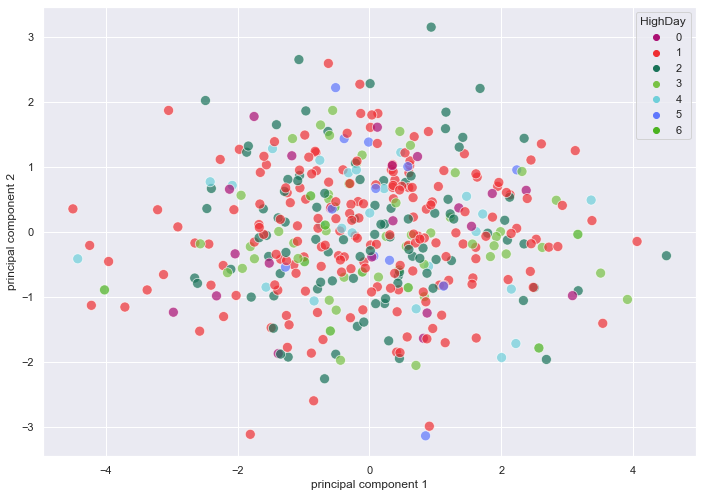

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint


df = seasonStatsMod.loc[(seasonStatsMod['Season'] >= 2010) & (seasonStatsMod['Season'] <= 2015) & (seasonStatsMod["HighDay"] >= 0)] 

x = df.loc[:, ['AVGFGA3', 'AVGFTM', 'AVGFTA', 'AVGOR', 'AVGTO']].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4', 'principal component 5'])


df = df.reset_index()

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]

colors = []
n = 7
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=principalDf, x="principal component 1", y = "principal component 2", hue="HighDay", palette=colors, s=100, alpha=0.7)


pca.components_

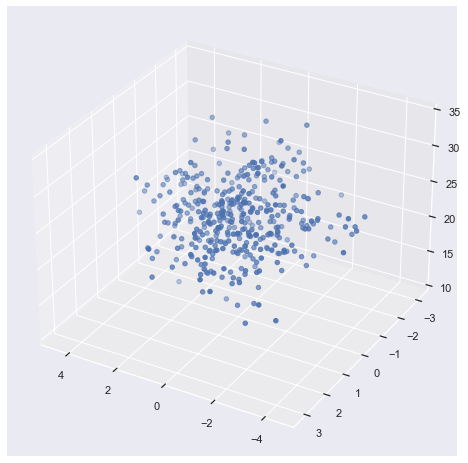

In [18]:
ax = plt.figure().add_subplot(projection="3d", azim=120)

ax.scatter(
    principalDf["principal component 1"],
    principalDf["principal component 2"],
    principalDf["GamesWon"]
)

plt.show()

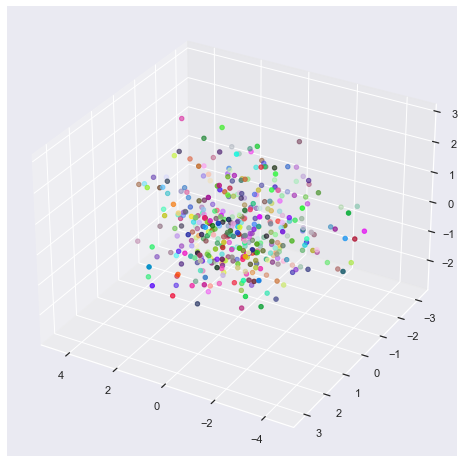

In [19]:
colors = []
n = 401
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
ax = plt.figure().add_subplot(projection="3d", azim=120)

ax.scatter(
    principalDf["principal component 1"],
    principalDf["principal component 2"],
    principalDf["principal component 3"],
    c=colors
)

plt.show()

array([[ 0.04389135,  0.13622657, -0.02296916,  0.0039403 ,  0.01163371,
         0.04468311,  0.1425867 , -0.15936056, -0.00426346, -0.0018823 ,
         0.23982174, -0.03110501,  0.2780896 , -0.08859972, -0.16802117,
        -0.09060851, -0.10435907,  0.27487739,  0.27819849,  0.00506899,
         0.09840801, -0.04616822,  0.27236373, -0.039025  ,  0.10934616,
         0.04707241,  0.13641305,  0.31690284,  0.05119653,  0.09059712,
        -0.2550082 , -0.24685059,  0.12829464, -0.1951809 ,  0.03400834,
        -0.22088301,  0.21630657, -0.09305398,  0.26390594],
       [-0.15913474, -0.22524114, -0.05851689, -0.08461473, -0.1812211 ,
        -0.17941504, -0.07934648, -0.14244707, -0.05635161, -0.21514963,
        -0.03094311, -0.02896662, -0.16271604, -0.30621955, -0.29938293,
        -0.22610699, -0.21821646, -0.16108106, -0.15747196, -0.20981787,
        -0.20607044, -0.27097811, -0.05042965, -0.20791006, -0.17529189,
        -0.18054016,  0.18850282,  0.09764009,  0.12055189,  0.

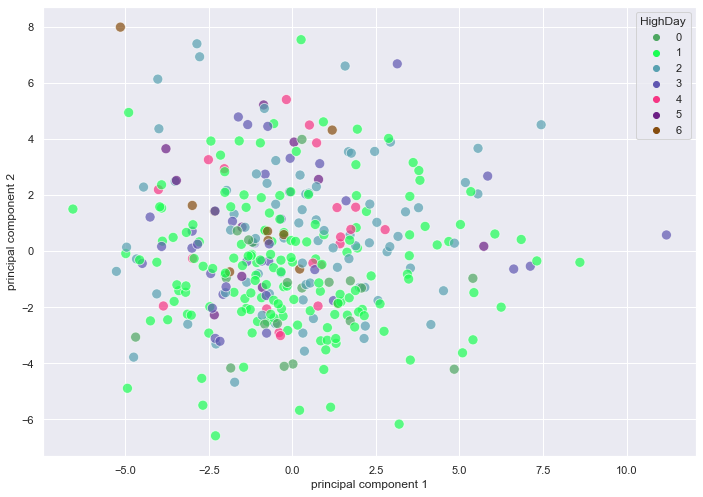

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint


df = seasonStatsMod.loc[(seasonStatsMod['Season'] >= 2014) & (seasonStatsMod['Season'] <= 2018) & (seasonStatsMod["HighDay"] >= 0)] 

ratios = []
for stat in statsMeasured:
    ratios.append(stat)

x = df.loc[:, ratios].values
# x = df.loc[:, statsMeasured].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4', 'principal component 5'])


df = df.reset_index()

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]

colors = []
n = 7
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=principalDf, x="principal component 1", y = "principal component 2", hue="HighDay", palette=colors, s=100, alpha=0.7)


pca.components_

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets
# from sklearn.inspection import DecisionBoundaryDisplay

# # import some data to play with
# iris = datasets.load_iris()
# # Take the first two features. We could avoid this by using a two-dim dataset
# X = np.array(principalDf[["principal component 1", "principal component 2"]])
# y = np.array(principalDf["HighDay"])

# # we create an instance of SVM and fit out data. We do not scale our
# # data since we want to plot the support vectors
# C = 100 # SVM regularization parameter
# models = (
#     svm.SVC(kernel="linear", C=C),
#     svm.LinearSVC(C=C, max_iter=10000),
#     svm.SVC(kernel="rbf", gamma=0.0001, C=C),
#     svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
# )
# models = (clf.fit(X, y) for clf in models)

# # title for the plots
# titles = (
#     "SVC with linear kernel",
#     "LinearSVC (linear kernel)",
#     "SVC with RBF kernel",
#     "SVC with polynomial (degree 3) kernel",
# )

# # Set-up 2x2 grid for plotting.
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = X[:, 0], X[:, 1]

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel=iris.feature_names[0],
#         ylabel=iris.feature_names[1],
#     )
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
